In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_Constraint/mplstyles


# Using New Calculations to Determine $\sigma_Q$

In the note `QEr_2D_joint.ipynb` we found the two-dimensional Q-$\tilde{E}_r$ distribution that we expect, given a certain Edelweiss detector resolution from their 2004 paper [REF]. Here, we compare the Edw. expectation for the yield (Q) width to what one would expect given those two-dimensional distributions. We also compare to data generated in our "physically correct" style (see `ms_correction.ipynb`). 



In [2]:
#get the resolutions for GGA3
import EdwRes as er

aH=0.035
V=4.0
C=0.0
sigHv,sigIv,sigQerv,sigH_NRv,sigI_NRv,sigQnrv = er.getEdw_det_res('GGA3',V,'data/edw_res_data.txt',aH,C)

[1.3, 1.5, 0.4, 3.1, 2.7]


In [3]:
#make an electron-recoil data set
import observable_simulations as osim
Qer,Erer = osim.simQEr_ER('GGA3',V=V,aH=aH,C=C,F=0.0,HighER=300)

print(Erer)

[1.3, 1.5, 0.4, 3.1, 2.7]
[  1.10921653  90.30953923 255.26833024 ... 101.45348157 209.14170234
  86.92738285]


In [4]:
#get statistics given a certain binning
import histogram_yield as hy
#bins = [0,20,40,60,80,100,120,140,160,180,200]
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
bins = np.asarray(bins)
xE = (bins[:-1] + bins[1:]) / 2

bindf,bindfE = hy.QEr_Ebin(Qer, Erer, bins=bins,silent=True)
qbootsigs,qbootsigerrsl,qbootsigerrsu = hy.QEr_Qboot(bindf,bins,silent=True)
qbootcorrs = hy.QEr_QbootBC(bindfE,qbootsigs,xE,20,bins,silent=True)

print(qbootsigs)
print(qbootsigerrsl)
print(qbootsigerrsu)
print(qbootcorrs)

[22.29395525  0.147023    0.09121237  0.07055     0.06011306  0.05429193
  0.05064856  0.0482195   0.04660879  0.04524496  0.04434724  0.0435121
  0.0430321   0.04274074  0.04237809  0.04205647  0.04184839  0.0415587
  0.04157399  0.0413373 ]
[8.70303807e+00 7.07573184e-04 4.13276120e-04 3.04581305e-04
 2.65835104e-04 2.45063117e-04 2.23165790e-04 2.11658171e-04
 2.04344718e-04 2.05168557e-04 2.00701320e-04 1.93087288e-04
 1.90963599e-04 1.92600579e-04 1.89191386e-04 1.87335330e-04
 1.91307216e-04 1.86672744e-04 1.88753171e-04 1.81830331e-04]
[9.79319393e+00 7.09290272e-04 4.09227723e-04 3.09230462e-04
 2.73619939e-04 2.38969481e-04 2.30321899e-04 2.13432411e-04
 2.11939162e-04 2.02276877e-04 1.99296610e-04 1.92780472e-04
 1.92401432e-04 1.92592177e-04 1.90564242e-04 1.90388761e-04
 1.84843282e-04 1.90183267e-04 1.81518970e-04 1.86377489e-04]
[68.48907951  0.19750031  0.99083871  0.99594717  0.99747592  0.9979843
  0.99842478  0.99867146  0.99881221  0.99902561  0.99910417  0.99923136


In [9]:
import fano_calc as fc

#recall defaults (filename='test.h5', 
#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
E,sig = fc.RWCalc(filename='data/test.h5')

print(np.shape(E))

GGA3/ER/4.0/1.000E-04/0.035/000/
True
(204,)


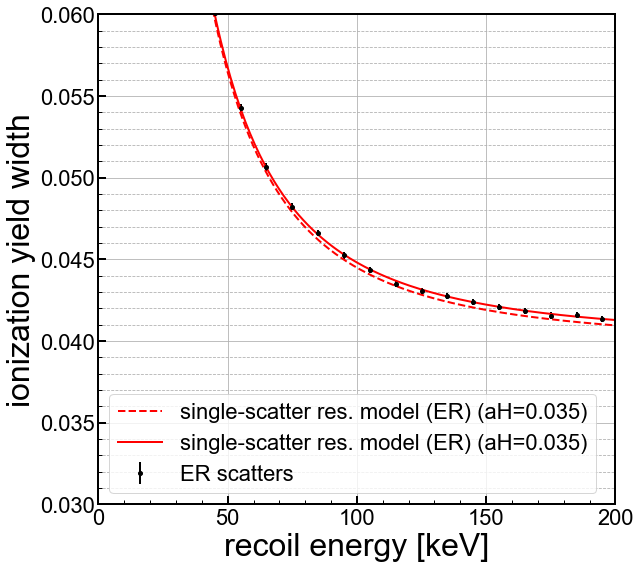

In [10]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQerv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.plot(E,sig,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.errorbar(xE,np.sqrt(qbootsigs**2), yerr=(qbootsigerrsl,qbootsigerrsu),color='k', marker='o', \
         markersize=4,linestyle='none',label='ER scatters', linewidth=2)




ymin = 0.03
ymax = 0.06



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()